# Import modules

In [1]:
import torch
import os

import cv2
from google.colab.patches import cv2_imshow
import datetime as dt
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import os
import pandas as pd
from glob import glob
import shutil
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import h5py
import yaml

import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Working on device= {device}')
print()
# print(torch.cuda.get_device_name(torch.cuda.current_device()))
print('torch: ',torch.__version__)


torch.set_printoptions(linewidth=120)

Working on device= cuda

torch:  1.10.0+cu111


# Preparing Dataset

## Download image data from Bing

In [ ]:
!git clone https://github.com/ostrolucky/Bulk-Bing-Image-downloader.git

Cloning into 'Bulk-Bing-Image-downloader'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 188 (delta 4), reused 7 (delta 2), pack-reused 178
Receiving objects: 100% (188/188), 49.58 KiB | 957.00 KiB/s, done.
Resolving deltas: 100% (100/100), done.


In [ ]:
!pwd

/content


In [ ]:
os.chdir('/content/Bulk-Bing-Image-downloader')
!pwd

/content/Bulk-Bing-Image-downloader


In [ ]:
!ls

bbid.py  LICENSE  README.md


In [2]:
animals_name_dict = {
                        'Sikorka_bogatka' : 'Parus major', #0
                        'Wrobel_domowy' : 'Passer domesticus', #1
                        'Rudzik' : 'Erithacus rubecula', # 2
                        'Dzwoniec' : 'Chloris chloris', # 3
                        'Dzieciol_duzy' : 'Dendrocopos major', # 4
                        'Kwiczol' : 'Turdus pilaris', # 5
                        'Sierpowka' : 'Streptopelia decaocto', # 6
                        'Kos' : 'Turdus merula', # 7
                        'Szpak' : 'Sturnus vulgaris', #8
                        'Raniuszek' : 'Aegithalos caudatus', #9
                        'sroka' : 'Eurasian Magpie', #10
                        'kawka' : 'Corvus monedula', # 11
                        'wilga_zwyczajna' : 'Oriolus oriolus', # 12
                        'dzik' : 'Sus scrofa', # 13
                        'wiewiorka' : 'Sciurus vulgaris', # 14
                        'sarna' : 'Capreolus capreolus', #15
                        'jelen_szlachetny' : 'Cervus elaphus', # 16
                        'sojka' : 'Garrulus glandarius', # 17
                        'wilk' : 'Canis lupus', # 18
                     
                        # 'gil' :'Eurasian bullfinch',
                        # 'borsuk' : 'European Badger',
                        #  'lis' : 'european fox',
                        # 'zajac' : 'european hare',
                        }

animals_name_dict.values()

dict_values(['Parus major', 'Passer domesticus', 'Erithacus rubecula', 'Chloris chloris', 'Dendrocopos major', 'Turdus pilaris', 'Streptopelia decaocto', 'Turdus merula', 'Sturnus vulgaris', 'Aegithalos caudatus', 'Eurasian Magpie', 'Corvus monedula', 'Oriolus oriolus', 'Sus scrofa', 'Sciurus vulgaris', 'Capreolus capreolus', 'Cervus elaphus', 'Garrulus glandarius', 'Canis lupus'])

In [3]:
class_names = list( animals_name_dict.keys() )
class_names

['Sikorka_bogatka',
 'Wrobel_domowy',
 'Rudzik',
 'Dzwoniec',
 'Dzieciol_duzy',
 'Kwiczol',
 'Sierpowka',
 'Kos',
 'Szpak',
 'Raniuszek',
 'sroka',
 'kawka',
 'wilga_zwyczajna',
 'dzik',
 'wiewiorka',
 'sarna',
 'jelen_szlachetny',
 'sojka',
 'wilk']

In [ ]:
os.mkdir('animal_data')

In [ ]:
os.chdir('/content/Bulk-Bing-Image-downloader/animal_data')
!pwd

/content/Bulk-Bing-Image-downloader/animal_data


In [ ]:
%%time
! /content/Bulk-Bing-Image-downloader/bbid.py -s 'european hare' -o 'zajac' --limit 50 --filters +filterui:age-lt525600

FAIL: european hare.jpeg
SKIP: Already downloaded maxresdefault-17.jpg, not saving
SKIP: Already downloaded 18cbca43a3a757c313795dee5a2d28f5.jpg, not saving
SKIP: Already downloaded 712d41a084ebaebae70ab94d20a76711--ph.jpg, not saving
SKIP: Already downloaded bf435d12349df18758931c3f36efbe8d.jpg, not saving
SKIP: Already downloaded 37c9d79b018e8e877ff13607302c4bad.jpg, not saving
SKIP: Already downloaded d0dbd2dccac9a470065a8886a92a11e8.jpg, not saving
SKIP: Already downloaded c61b777c1a608c7019a15fd6a5dd6567.jpg, not saving
FAIL: Lepus_europaeus_(Causse_Méjean%2C_Lo.jpg
SKIP: Already downloaded c11073971d81f859cbb5a0c0c0a09ee3.jpg, not saving
SKIP: Already downloaded f715c44c1d3c6db4bd7dccbe66d95bfd.jpg, not saving
SKIP: Already downloaded 17dcf1ebbdf4a17474862f6a11a7179a--po.jpg, not saving
SKIP: Already downloaded a8720b4426ac8f8eefb5969a553330b6.jpg, not saving
SKIP: Already downloaded 2ebc71a27fa104f9f3b07a6022265b41.jpg, not saving
SKIP: Already downloaded 2b805efef959ce074eae30c

In [ ]:
# %%time
# for i, animal_name in enumerate( animals_name_dict.items() ):
#     pol_name, lat_name = animal_name
#     print(f'i, pol_name: {pol_name}, lat_name: {lat_name}')
#     ! /content/Bulk-Bing-Image-downloader/bbid.py -s '$lat_name' -o '$pol_name' --limit 500 --filters +filterui:age-lt525600
  

### Count images

In [4]:
def count_images(path_folder):

  class_names = os.listdir(path_folder)
  for no, cls_name in enumerate(class_names):
    
      path_to_class = os.path.join(path_folder, cls_name)
      imgs_count = os.listdir(path_to_class)
      
      print(f'class name: {cls_name} {len(imgs_count)} images')


In [ ]:
path_folder = '/content/Bulk-Bing-Image-downloader/animal_data/'

count_images(path_folder)

class name: kawka 1019 images
class name: sojka 1013 images
class name: Sierpowka 1027 images
class name: jelen_szlachetny 1044 images
class name: dzik 1029 images
class name: lis 985 images
class name: Sikorka_bogatka 1029 images
class name: Rudzik 992 images
class name: gil 1027 images
class name: Kos 1022 images
class name: wiewiorka 1012 images
class name: wilga_zwyczajna 996 images
class name: Wrobel_domowy 985 images
class name: wilk 1025 images
class name: borsuk 1002 images
class name: Szpak 999 images
class name: sarna 1022 images
class name: Dzieciol_duzy 1023 images
class name: Kwiczol 1007 images
class name: Raniuszek 1025 images
class name: zajac 1031 images
class name: sroka 1004 images
class name: Dzwoniec 1047 images


### Change file names

In [ ]:
def change_img_names(path_folder):
  class_names = os.listdir(path_folder)
  for no, cls_name in enumerate(class_names):
      path_to_class = os.path.join(path_folder, cls_name)
      classes_list = os.listdir(path_to_class)

      for i, img in enumerate(classes_list): 
        old_path = os.path.join(path_folder, cls_name, img)
        new_path = os.path.join(path_folder, cls_name, cls_name + str(i) + '.jpg')
        os.rename(old_path, new_path) 

In [ ]:
%%time

change_img_names('/content/Bulk-Bing-Image-downloader/animal_data')

CPU times: user 121 ms, sys: 496 ms, total: 617 ms
Wall time: 632 ms


### Delete none type data

In [ ]:
class_names = os.listdir('/content/Bulk-Bing-Image-downloader/animal_data')

for no, cls_name in enumerate(class_names):
  path_to_class = os.path.join(path_folder, cls_name)
  classes_list = os.listdir(path_to_class)
  for i, img in enumerate(classes_list):
    path_to_img = os.path.join(path_to_class, img) 
    
    image = cv2.imread( path_to_img )
    if image is None:
      # print(f'{path_to_img} - {type(image)}')
      os.remove(path_to_img)
      print(f'Delete {cls_name} type: {type(image)}')


Delete kawka type: <class 'NoneType'>
Delete sojka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete Sierpowka type: <class 'NoneType'>
Delete jelen_szlachetny type: <class 'NoneType'>
Delete jelen_szlachetny type: <class 'NoneType'>
Delete jelen_szlachetny type: <class 'NoneType'>
Delete dzik type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete lis type: <class 'NoneType'>
Delete Sikorka_bogatka type: <class 'NoneType'>
Delete Rudzik type: <class 'NoneType'>

### Resize images

In [ ]:
def resize_images(path_folder):
    class_names = os.listdir(path_folder)
    
    height = 640
 
    for no, cls_name in enumerate(class_names):
        path_to_class = os.path.join(path_folder, cls_name)
        classes_list = os.listdir(path_to_class)
        
        for i, img in enumerate(classes_list):
          path_to_img = os.path.join(path_to_class, img)
          image = cv2.imread( path_to_img )

          h, w = image.shape[:2]

          # Calculating the ratio
          ratio = height / w
            
          # Creating a tuple containing width and height
          dim = (height, int(h * ratio))

          resized_img = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
          cv2.imwrite(path_to_img, resized_img)

In [ ]:
resize_images(path_folder)

(426, 640, 3)


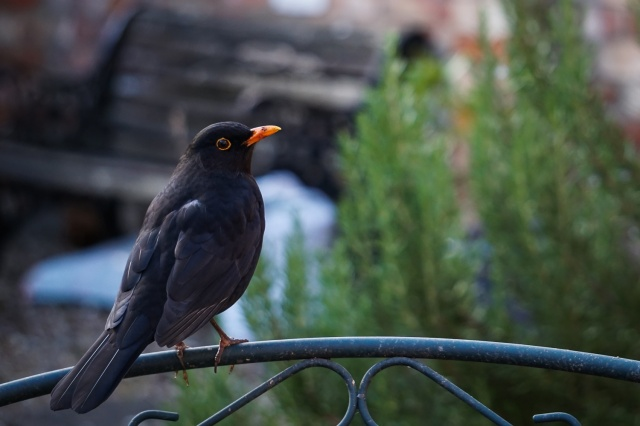

In [ ]:
img = cv2.imread('/content/Bulk-Bing-Image-downloader/animal_data/Kos/Kos28.jpg')
print(img.shape)
cv2_imshow(img)

### Create zip file

In [ ]:
os.chdir('/content')
!pwd

/content


In [ ]:
%%time

dir_name = '/content/Bulk-Bing-Image-downloader/animal_data'
output_filename = 'animal_dataset'

shutil.make_archive(output_filename, 'zip', dir_name)

CPU times: user 1min 45s, sys: 7.24 s, total: 1min 52s
Wall time: 1min 53s


### Labeling data

In [ ]:
# https://www.makesense.ai/

# Preparing data for YOLO

## Unpacking dataset

In [5]:
def unpack_archive(archfile, target_dir):
  shutil.unpack_archive(
                        filename=archfile,
                        extract_dir=target_dir,
                        format='zip')

In [ ]:
# the archive file

animal_detection_project_path = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection'
dataset = 'animal_data_0702.zip'

dataset_zip_file = os.path.join(animal_detection_project_path, dataset )


dataset_dir = "/content/animal_dataset"

unpack_archive(archfile=dataset_zip_file, target_dir=dataset_dir)

## Count images

In [7]:
animal_images = os.path.join(dataset_dir, 'animal_imgs' )

count_images(animal_images)

class name: sarna 70 images
class name: wilga_zwyczajna 69 images
class name: Sierpowka 68 images
class name: sojka 67 images
class name: Raniuszek 68 images
class name: wiewiorka 69 images
class name: Dzwoniec 67 images
class name: Dzieciol_duzy 70 images
class name: Kos 68 images
class name: dzik 62 images
class name: Rudzik 70 images
class name: jelen_szlachetny 64 images
class name: Szpak 68 images
class name: Sikorka_bogatka 65 images
class name: Wrobel_domowy 66 images
class name: sroka 69 images
class name: kawka 66 images
class name: wilk 63 images
class name: Kwiczol 68 images


In [8]:
def move_data_to_shared_folder(path_to_folder):
  cls_dir_list = os.listdir(path_to_folder)

  for cls_name in cls_dir_list:
    imgs_path = os.path.join(path_to_folder, cls_name)
    images_list = os.listdir( imgs_path )
    
    for img in images_list:
      img_src = os.path.join(imgs_path, img)
      shutil.move(src=img_src, dst=path_to_folder)

In [9]:
move_data_to_shared_folder(animal_images)

In [10]:
# Delete empty folders
for label in class_names:
  path_to_delete = os.path.join(animal_images, label)
  if path_to_delete:
    shutil.rmtree(path_to_delete)

In [11]:
len(os.listdir(animal_images))

1277

In [12]:
os.chdir('/content/animal_dataset')
!pwd

/content/animal_dataset


In [14]:
len(os.listdir('/content/animal_dataset/yolo_labels' ))

1277

## Download YoloV5

In [15]:
!pwd

/content/animal_dataset


In [16]:
os.mkdir('/content/working/')

os.chdir('/content/working/')
!pwd

/content/working


In [17]:
# # clone repo
!git clone https://github.com/ultralytics/yolov5.git 

# # change the working directory to yolov5 
# #%cd yolov5
os.chdir('/content/working/yolov5') 

# # install dependencies
%pip install -qr requirements.txt 

# # Change the working directory back
os.chdir('/content/working/')

# 1fab18 - green

Cloning into 'yolov5'...
remote: Enumerating objects: 10892, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 10892 (delta 1), reused 4 (delta 0), pack-reused 10885
Receiving objects: 100% (10892/10892), 10.99 MiB | 31.00 MiB/s, done.
Resolving deltas: 100% (7518/7518), done.
     |████████████████████████████████| 596 kB 7.0 MB/s 


In [18]:
%pip install -q wandb
!wandb disabled

     |████████████████████████████████| 1.7 MB 8.2 MB/s 
     |████████████████████████████████| 143 kB 65.8 MB/s 
     |████████████████████████████████| 180 kB 73.0 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
W&B disabled.


## Create train, val, test folders

In [19]:
os.chdir('/content/working/yolov5/data')

!pwd

/content/working/yolov5/data


In [20]:
# base_dir
    # images
        # train
        # validation
        # test
    # labels
        # train
        # validation
        # test


base_dir = 'animal_detection'
os.mkdir(base_dir)

# images
images = os.path.join(base_dir, 'images')
os.mkdir(images)

# labels
labels = os.path.join(base_dir, 'labels')
os.mkdir(labels)


# create new folders inside images
train = os.path.join(images, 'train')
os.mkdir(train)
validation = os.path.join(images, 'val')
os.mkdir(validation)
test = os.path.join(images, 'test')
os.mkdir(test)

# create new folders inside labels
train = os.path.join(labels, 'train')
os.mkdir(train)
validation = os.path.join(labels, 'val')
os.mkdir(validation)
test = os.path.join(labels, 'test')
os.mkdir(test)

In [21]:
!pwd
print()
!ls

/content/working/yolov5/data

animal_detection  GlobalWheat2020.yaml	scripts        xView.yaml
Argoverse.yaml	  hyps			SKU-110K.yaml
coco128.yaml	  images		VisDrone.yaml
coco.yaml	  Objects365.yaml	VOC.yaml


## Generate image names list

In [22]:
print(f'animal images: {animal_images}')
print(f'yolo labels: {yolo_labels}')

animal images: /content/animal_dataset/animal_imgs
yolo labels: /content/animal_dataset/yolo_labels


In [23]:
images = [ x for x in os.listdir( animal_images ) ] 
annotations  = [ x for x in os.listdir( yolo_labels ) ]

images.sort()
annotations.sort()

print(f'images: {len(images)} | annotations: {len(annotations)}') 

images: 1277 | annotations: 1277


## Split data to train, val, test

In [61]:
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size=0.3, random_state=1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size=0.05, random_state=1)


print(f'Train images: {len(train_images)}' )
print(f'Val images: {len(val_images)}' )
print(f'Test images: {len(test_images)}' )
print()
print(f'Train annotations: {len(train_annotations)}' )
print(f'Val annotations: {len(val_annotations)}' )
print(f'Test annotations: {len(test_annotations)}' )

Train images: 893
Val images: 364
Test images: 20

Train annotations: 893
Val annotations: 364
Test annotations: 20


## Move files to specific folders

In [30]:
 def move_files_to_folder(data_list, src_path, dst_path):
  for item in data_list:
    shutil.move(os.path.join(src_path, item), dst_path)

In [31]:
img_train_dir= '/content/working/yolov5/data/animal_detection/images/train'
img_val_dir= '/content/working/yolov5/data/animal_detection/images/val'
img_test_dir= '/content/working/yolov5/data/animal_detection/images/test'

label_train_dir= '/content/working/yolov5/data/animal_detection/labels/train'
label_val_dir = '/content/working/yolov5/data/animal_detection/labels/val'
label_test_dir= '/content/working/yolov5/data/animal_detection/labels/test'



move_files_to_folder(train_images, animal_images, img_train_dir)
move_files_to_folder(val_images, animal_images, img_val_dir)
move_files_to_folder(test_images, animal_images, img_test_dir)

move_files_to_folder(train_annotations, yolo_labels, label_train_dir)
move_files_to_folder(val_annotations, yolo_labels, label_val_dir)
move_files_to_folder(test_annotations, yolo_labels, label_test_dir)


In [32]:
print(f'Train images: {len( os.listdir(img_train_dir) )}    Train annotations: {len( os.listdir(label_train_dir))}')
print(f'Val images:   {len( os.listdir(img_val_dir) )}    Val annotations:   {len( os.listdir(label_val_dir) )}')
print(f'Test images:  {len( os.listdir(img_test_dir) )}      Test images:      {len( os.listdir(label_test_dir) )}')

Train images: 893    Train annotations: 893
Val images:   364    Val annotations:   364
Test images:  20      Test images:      20


## Create the data config file

In [33]:
os.chdir('/content/working')

!pwd

/content/working


In [34]:
class_names

['Sikorka_bogatka',
 'Wrobel_domowy',
 'Rudzik',
 'Dzwoniec',
 'Dzieciol_duzy',
 'Kwiczol',
 'Sierpowka',
 'Kos',
 'Szpak',
 'Raniuszek',
 'sroka',
 'kawka',
 'wilga_zwyczajna',
 'dzik',
 'wiewiorka',
 'sarna',
 'jelen_szlachetny',
 'sojka',
 'wilk']

In [35]:
yaml_dict = {
            'train': img_train_dir,              # path to the img train folder
            'val': img_val_dir,                  # path to the val folder
            'test': img_test_dir,
            'nc': len(class_names),                             # number of classes
            'names': class_names                    # list of label names
            }

with open(r'yolov5/data/animal_detection.yaml', 'w') as file:
    documents = yaml.dump(yaml_dict, file)              

In [36]:
!cat 'yolov5/data/animal_detection.yaml'

names: [Sikorka_bogatka, Wrobel_domowy, Rudzik, Dzwoniec, Dzieciol_duzy, Kwiczol,
  Sierpowka, Kos, Szpak, Raniuszek, sroka, kawka, wilga_zwyczajna, dzik, wiewiorka,
  sarna, jelen_szlachetny, sojka, wilk]
nc: 19
test: /content/working/yolov5/data/animal_detection/images/test
train: /content/working/yolov5/data/animal_detection/images/train
val: /content/working/yolov5/data/animal_detection/images/val


# Training data

In [37]:
os.chdir('/content/working/yolov5') 

!pwd

/content/working/yolov5


In [63]:
results_dir = 'animal_det_b08e85_yolov5s_'


In [64]:
!python train.py --img 640 --batch 8 --epochs 85 --data animal_detection.yaml --weights yolov5s.pt --name '$results_dir' --cache

wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 3
wandb: You chose 'Don't visualize my results'
train: weights=yolov5s.pt, cfg=, data=animal_detection.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=85, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=animal_det_b08e85_yolov5s_, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay

In [130]:
def show_img(runs_path, results_dir_list,  nrows, ncols, img_name=None):

  i = 1

  fig = plt.figure(figsize=(23,25) )

  for result_dir in results_dir_list:
    fig.add_subplot(nrows, ncols, i) 

    if img_name is None:
      img_path = os.path.join( runs_path, result_dir)
    else:
      img_path = os.path.join( runs_path, result_dir, img_name)

    image = plt.imread(img_path)

    plt.imshow(image)
    plt.grid(visible=False)
    plt.axis('off')
    fig.tight_layout()
    plt.title( result_dir )
    i += 1

In [133]:
detect_exp[1]

'animal_det_b08e85_yolov5s_'

## Confusion matrix

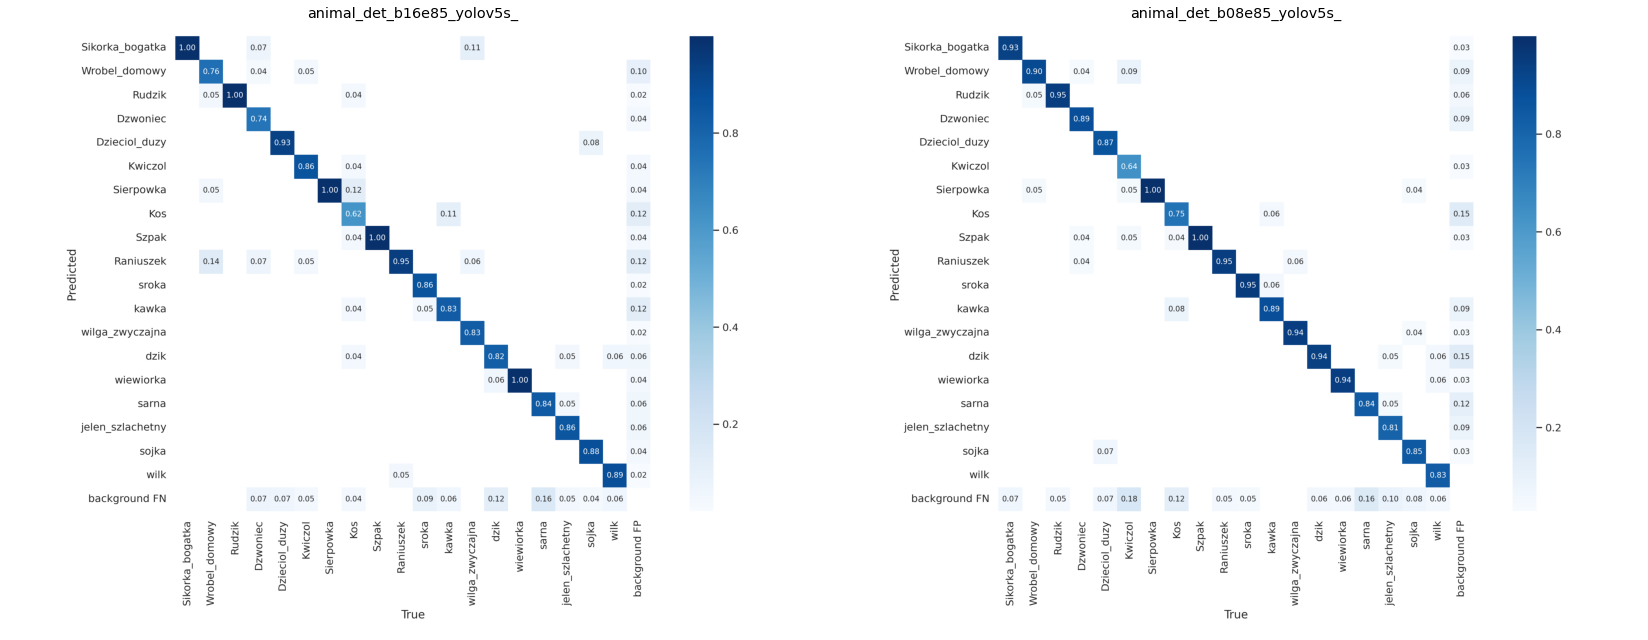

In [136]:
show_img(runs_path=train_runs_path,
         results_dir_list=['animal_det_b16e85_yolov5s_', 'animal_det_b08e85_yolov5s_'],
         img_name='confusion_matrix.png',
         nrows=1, ncols=2,
         )

# Test model

## Test on test dataset

In [68]:
# get a list of detect experiments
exp_list = os.listdir('runs/detect/')


detect_exp = exp_list

detect_exp

['animal_det_b16e85_yolov5s_5',
 'animal_det_b08e85_yolov5s_',
 'animal_det_b16e85_yolov5s_4',
 'animal_det_b16e85_yolov5s_3',
 '$result_dir',
 'animal_det_b16e85_yolov5s_',
 'animal_det_b16e85_yolov5s_2']

In [66]:
train_runs_path = '/content/working/yolov5/runs/train'
detect_runs_path = '/content/working/yolov5/runs/detect/'

result_dir = detect_exp[1]
best_weights = os.path.join( train_runs_path, results_dir, 'weights/best.pt')


print(f'img_test_dir: {img_test_dir} ')
print(f'best_weights: {best_weights} ')

img_test_dir: /content/working/yolov5/data/animal_detection/images/test 
best_weights: /content/working/yolov5/runs/train/animal_det_b08e85_yolov5s_/weights/best.pt 


In [67]:
!python detect.py --source '$img_test_dir' --weights '$best_weights' --conf 0.25 --name '$result_dir' --line-thickness 2

detect: weights=['/content/working/yolov5/runs/train/animal_det_b08e85_yolov5s_/weights/best.pt'], source=/content/working/yolov5/data/animal_detection/images/test, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b08e85_yolov5s_, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients, 16.0 GFLOPs
image 1/20 /content/working/yolov5/data/animal_detection/images/test/Dzięcioł_duży40.jpg: 448x640 1 Dzieciol_duzy, 1 Szpak, Done. (0.017s)
image 2/20 /content/working/yolov5/data/animal_detection/images/test/Dzięcioł_duży46.jpg: 640x448 1 Dzieciol_duzy, Done. (0.015

### b16e85_yolov5s

In [138]:
b16e85_runs_path = os.path.join(detect_runs_path, detect_exp[5])
pred_list = os.listdir(f'runs/detect/{detect_exp[5]}')

show_img(
         runs_path=b16e85_runs_path,
         results_dir_list=pred_list,
         nrows=5, ncols=4
         )

Output hidden; open in https://colab.research.google.com to view.

### b08e85_yolov5s

In [139]:
detect_runs_path = '/content/working/yolov5/runs/detect/'


b08e85_runs_path = os.path.join(detect_runs_path, detect_exp[1])
pred_list = os.listdir(f'runs/detect/{detect_exp[1]}')

show_img(
         runs_path=b08e85_runs_path,
         results_dir_list=pred_list,
         nrows=5, ncols=4
         )

Output hidden; open in https://colab.research.google.com to view.

## Test on other data

In [83]:
best_weights

'/content/working/yolov5/runs/train/animal_det_b08e85_yolov5s_/weights/best.pt'

In [82]:
os.chdir('/content/working/yolov5')
!pwd

/content/working/yolov5


In [84]:
video1 = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Dziki_wilki_i_jelenie.mp4'

!python detect.py --source '$video1'  --weights '$best_weights' --conf 0.25 --name '$result_dir' --line-thickness 2

detect: weights=['/content/working/yolov5/runs/train/animal_det_b08e85_yolov5s_/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Dziki_wilki_i_jelenie.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b08e85_yolov5s_, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients, 16.0 GFLOPs
video 1/1 (1/3771) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Dziki_wilki_i_jelenie.mp4: 384x640 1 dzik, Done. (0.018s)
video 1/1 (2/3771) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Dziki_wilk

In [85]:
img1 = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/wiew.jpg'

!python detect.py --source '$img1'  --weights '$best_weights' --conf 0.25 --name '$result_dir' --line-thickness 3

detect: weights=['/content/working/yolov5/runs/train/animal_det_b08e85_yolov5s_/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/wiew.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b08e85_yolov5s_, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/wiew.jpg: 384x640 1 wiewiorka, Done. (0.017s)
Speed: 0.7ms pre-process, 17.3ms inference, 1.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/animal_det_b

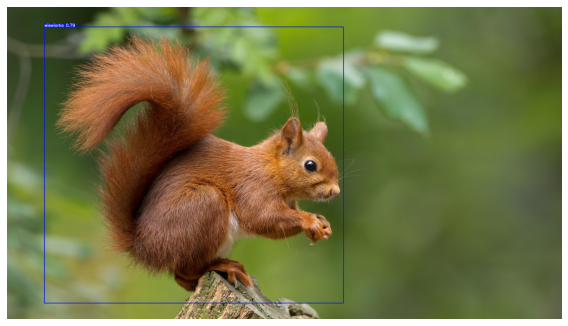

In [93]:
squirrel_img = os.path.join( detect_runs_path, results_dir + '3', 'wiew.jpg')

show_img(img_path=squirrel_img, size=(8,8))

In [86]:
img2 = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/20180413_151630.jpg'

!python detect.py --source '$img2'  --weights '$best_weights' --conf 0.25 --name '$result_dir' --line-thickness 2

detect: weights=['/content/working/yolov5/runs/train/animal_det_b08e85_yolov5s_/weights/best.pt'], source=/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/20180413_151630.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=animal_det_b08e85_yolov5s_, exist_ok=False, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-241-gf627bc5 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7061368 parameters, 0 gradients, 16.0 GFLOPs
image 1/1 /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/20180413_151630.jpg: 384x640 1 sroka, Done. (0.018s)
Speed: 0.6ms pre-process, 18.1ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/d

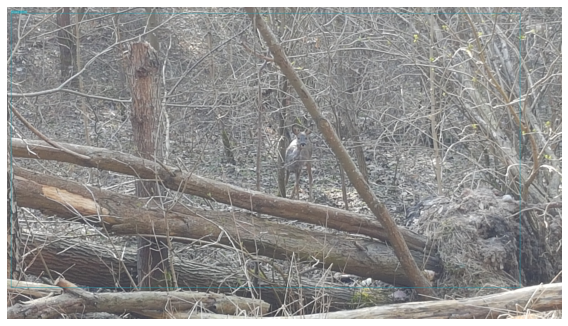

In [94]:
roe_deer_img = os.path.join( detect_runs_path, results_dir + '4', '20180413_151630.jpg')

show_img(img_path=roe_deer_img, size=(8,8))

In [87]:
video2 = '/content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4'

!python detect.py --source '$video2' --weights '$best_weights' --conf 0.25 --name '$result_dir' --line-thickness 2

Streaming output truncated to the last 5000 lines.
video 1/1 (3459/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4: 384x640 Done. (0.011s)
video 1/1 (3460/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4: 384x640 Done. (0.011s)
video 1/1 (3461/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4: 384x640 Done. (0.011s)
video 1/1 (3462/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4: 384x640 Done. (0.011s)
video 1/1 (3463/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4: 384x640 Done. (0.011s)
video 1/1 (3464/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4: 384x640 Done. (0.011s)
video 1/1 (3465/8456) /content/drive/MyDrive/ColabNotebooks/Projects/AnimalsDetection/Ptaki_w_karmniku.mp4: 384x640 Done. (0.011s)
video 1/1 (3466/8456) /content/d

# Make archive

In [95]:
dir_name = '/content/working/yolov5/runs'
output_filename = result_dir

shutil.make_archive(output_filename, 'zip', dir_name)

'/content/working/yolov5/animal_det_b08e85_yolov5s_.zip'

In [55]:
result_dir

'animal_det_b16e85_yolov5s_'